<a href="https://colab.research.google.com/github/abdisheikh94/dsc-project1/blob/master/dsc_phase1_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Data Analysis of Aircraft Incidents for Business Strategy Minimizing Risk

## Overview

In this project, I analyzed aviation accident data from the National Transportation Safety Board (NTSB) to help guide safer aircraft purchases.
Using Python and pandas, I cleaned and explored the data, focusing on trends in manufacturer safety, injury severity, and number of engines.
The analysis showed that aircraft from certain manufacturers and those with more engines tend to be involved in fewer and less severe accidents.
These insights informed three business recommendations to support data-driven decisions as the company enters the aviation industry.

## Business Understanding

The business problem focuses on minimizing risk as the company expands into aviation by purchasing aircraft for commercial and private use.
To support safe investment decisions, I analyzed historical accident data to identify manufacturers with fewer incidents, aircraft with more engines, and models linked to less severe outcomes. These factors directly impact safety, operational costs, and reputation, helping the company make informed, low-risk purchasing choices.

## Data Understanding

The dataset comes from the NTSB and contains records of civil aviation accidents from 1962 to 2023, including aircraft manufacturer, model, number of engines, location, and injury severity.
It reflects the safety history of different aircraft, which is critical for evaluating investment risks in aviation.
The analysis focuses on accident severity as the target variable, using both categorical and numerical data to uncover safety trends.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/AviationData.csv', encoding='latin1')

# Preview first few rows
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


The dataset contains accident reports from 1962 to 2023, including fields like aircraft manufacturer, model, number of engines in the aircraft, and injury severity. The target focus is on accident severity and safety trends among manufacturers and aircraft types.


## Basic information about the dataset

In [2]:
print("\nData Information:")
df.info()


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29623 entries, 0 to 29622
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                29623 non-null  object 
 1   Investigation.Type      29623 non-null  object 
 2   Accident.Number         29623 non-null  object 
 3   Event.Date              29623 non-null  object 
 4   Location                29613 non-null  object 
 5   Country                 29482 non-null  object 
 6   Latitude                8 non-null      float64
 7   Longitude               8 non-null      float64
 8   Airport.Code            15658 non-null  object 
 9   Airport.Name            17379 non-null  object 
 10  Injury.Severity         29623 non-null  object 
 11  Aircraft.damage         28978 non-null  object 
 12  Aircraft.Category       3665 non-null   object 
 13  Registration.Number     29612 non-null  object 
 14  Make               

## Displaying the number of rows and columns

In [3]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (29623, 31)


## Statistical Summary

In [4]:
print("\nSummary Statistics:")
df.describe(include='all')


Summary Statistics:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,29623,29623,29623,29623,29613,29482,8.000000,8.000000,15658,17379,...,29579,1584,29478.000000,29432.000000,29428.000000,29496.000000,29621,29387,29623,17176
unique,29171,2,29623,3636,10627,59,NaN,NaN,5003,8905,...,12,1251,NaN,NaN,NaN,NaN,3,12,5,768
top,20001214X45071,Accident,ANC92LA021,1982-05-16,"ANCHORAGE, AK",United States,NaN,NaN,NONE,PRIVATE,...,Personal,United Airlines,NaN,NaN,NaN,NaN,VMC,Landing,Probable Cause,31-03-1993
freq,3,28583,1,25,211,29172,NaN,NaN,617,102,...,16713,33,NaN,NaN,NaN,NaN,26770,7062,29412,448
mean,NaN,NaN,NaN,NaN,NaN,NaN,44.914271,-110.695764,NaN,NaN,...,NaN,NaN,0.439175,0.208447,0.341444,4.025122,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,11.772969,36.243789,NaN,NaN,...,NaN,NaN,3.452872,0.856616,1.550666,23.315074,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,30.757778,-173.240000,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,38.135556,-128.370625,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,44.243194,-101.121527,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,46.645833,-84.717222,NaN,NaN,...,NaN,NaN,0.000000,0.000000,0.000000,2.000000,NaN,NaN,NaN,NaN


## Data Preparation

I cleaned the dataset by dropping irrelevant columns, handling missing values through removal or forward-filling, and standardizing categorical data. These steps ensured the dataset was reliable and focused on key factors related to aircraft safety and risk assessment.

## Checking for missing values

In [5]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print("\nMissing Values:\n", missing_values)


Missing Values:
 Location                     10
Country                     141
Latitude                  29615
Longitude                 29615
Airport.Code              13965
Airport.Name              12244
Aircraft.damage             645
Aircraft.Category         25958
Registration.Number          11
Make                          7
Model                        17
Amateur.Built                 1
Number.of.Engines           332
Engine.Type                   4
FAR.Description           25958
Schedule                  24774
Purpose.of.flight            44
Air.carrier               28039
Total.Fatal.Injuries        145
Total.Serious.Injuries      191
Total.Minor.Injuries        195
Total.Uninjured             127
Weather.Condition             2
Broad.phase.of.flight       236
Publication.Date          12447
dtype: int64


### Dropping columns with more than 30% missing values

In [6]:
threshold = len(df) * 0.3
cols_to_drop = missing_values[missing_values > threshold].index
df = df.drop(columns=cols_to_drop, errors='ignore')

## Dropping irrelevant columns manually

In [7]:
df = df.drop(['Location', 'Country', 'Publication_Date','Report_Status',
              'Aircraft_Category',  'Broad_phase_of_flight','Schedule', 'Air_carrier',
              'FAR_Description', 'Longitude', 'Latitude', 'Airport_Code', 'Airport_Name'], axis=1, errors='ignore')
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Injury.Severity,Aircraft.damage,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status
0,20001218X45444,Accident,SEA87LA080,1948-10-24,Fatal(2),Destroyed,NC6404,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause
1,20001218X45447,Accident,LAX94LA336,1962-07-19,Fatal(4),Destroyed,N5069P,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause
2,20061025X01555,Accident,NYC07LA005,1974-08-30,Fatal(3),Destroyed,N5142R,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause
3,20001218X45448,Accident,LAX96LA321,1977-06-19,Fatal(2),Destroyed,N1168J,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause
4,20041105X01764,Accident,CHI79FA064,1979-08-02,Fatal(1),Destroyed,N15NY,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause


## Visualizing missing data

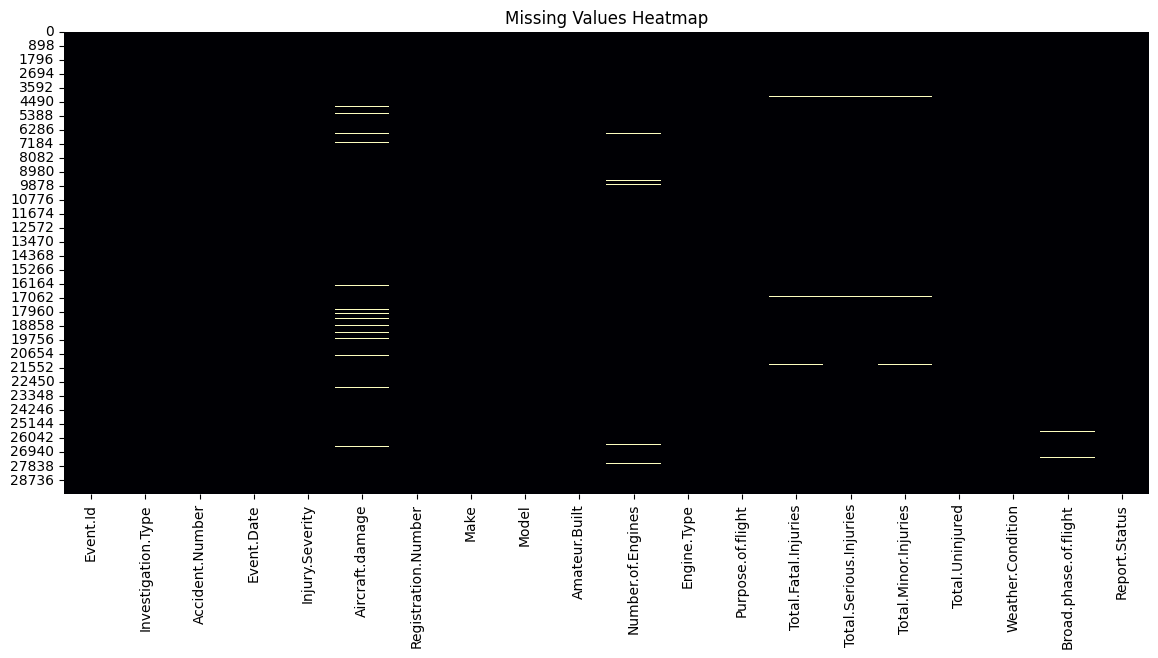

In [8]:
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap='magma')
plt.title('Missing Values Heatmap')
plt.show()

## Filling remaining values with forward fill

In [9]:
data = df.fillna(method='ffill')

<ipython-input-9-8c21be8192a7>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = df.fillna(method='ffill')


## Verifying missing after cleaning

In [10]:
print("\nMissing Values after cleaning:\n", data.isnull().sum().sum())


Missing Values after cleaning:
 0


## Check final data shape

In [11]:
df.shape

(29623, 20)

I dropped irrelevant columns and handled missing data appropriately to maintain focus on aircraft safety factors, ensuring a clean dataset for analysis.

# Exploratory Data Analysis(EDA)

I used exploratory data analysis (EDA) with groupings, aggregations, and visualizations to uncover trends related to aircraft safety. This descriptive approach was appropriate because the project focused on identifying safer aircraft models, not predictive modeling.

## Top 10 Aircraft Manufacturers

### Analyze aircraft manufacturer accident counts

In [12]:
manufacturer_counts = df['Make'].value_counts().head(10)

<ipython-input-13-b9eddfef0f59>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=manufacturer_counts.values, y=manufacturer_counts.index, palette='viridis')


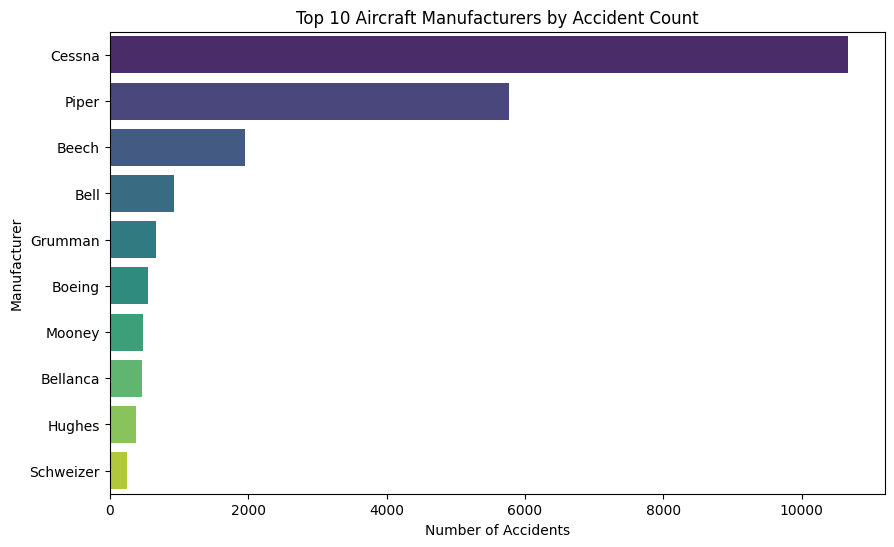

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(x=manufacturer_counts.values, y=manufacturer_counts.index, palette='viridis')
plt.title('Top 10 Aircraft Manufacturers by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('Manufacturer')
plt.show()

## Accidents by the number of engines in the aircraft

## Analyze the number of engines by the aircraft

In [14]:
engine_data = df[['Number.of.Engines', 'Total.Fatal.Injuries']]
engine_accident_counts = engine_data.groupby('Number.of.Engines').size().reset_index(name='Accident_Count')
engine_accident_counts = engine_accident_counts.sort_values(by='Accident_Count', ascending=False)
engine_accident_counts['Engine_Risk_Level'] = engine_accident_counts['Accident_Count'].apply(lambda x: 'High Risk' if x > 10 else 'Low Risk')


print(engine_accident_counts)

   Number.of.Engines  Accident_Count Engine_Risk_Level
1                1.0           24485         High Risk
2                2.0            3865         High Risk
0                0.0             474         High Risk
3                3.0             283         High Risk
4                4.0             184         High Risk


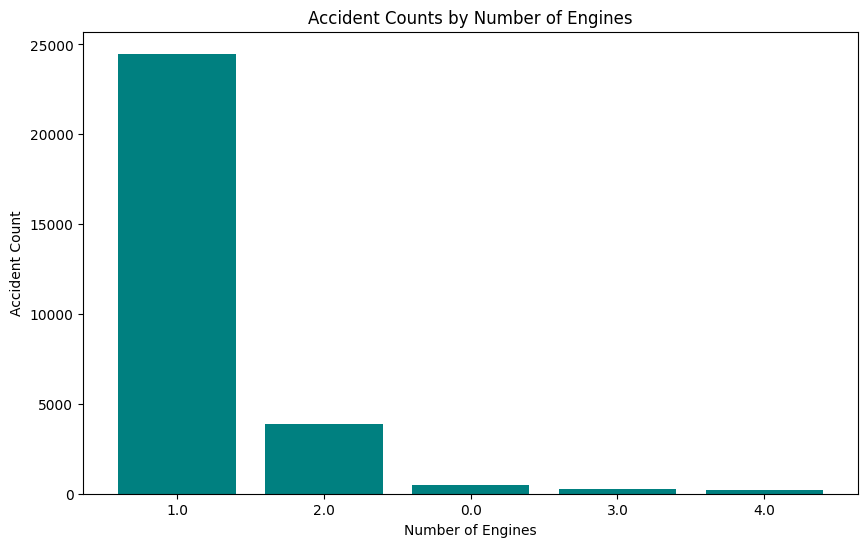

In [15]:
plt.figure(figsize=(10,6))
plt.bar(engine_accident_counts['Number.of.Engines'].astype(str), engine_accident_counts['Accident_Count'], color='teal')
plt.xlabel('Number of Engines')
plt.ylabel('Accident Count')
plt.title('Accident Counts by Number of Engines')
plt.show()

I conclude that the higher the number of engines the lower the accident count.

## Injury Severity Distribution

### Analyze injury severity

In [16]:
injury_counts = df['Injury.Severity'].value_counts()

<ipython-input-17-68a949998212>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=injury_counts.index, y=injury_counts.values, palette='coolwarm')


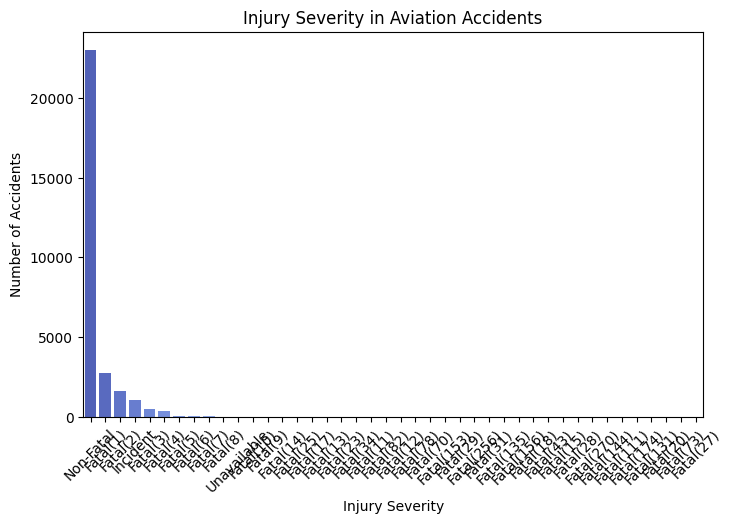

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(x=injury_counts.index, y=injury_counts.values, palette='coolwarm')
plt.title('Injury Severity in Aviation Accidents')
plt.xlabel('Injury Severity')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()

## Correlation Matrix

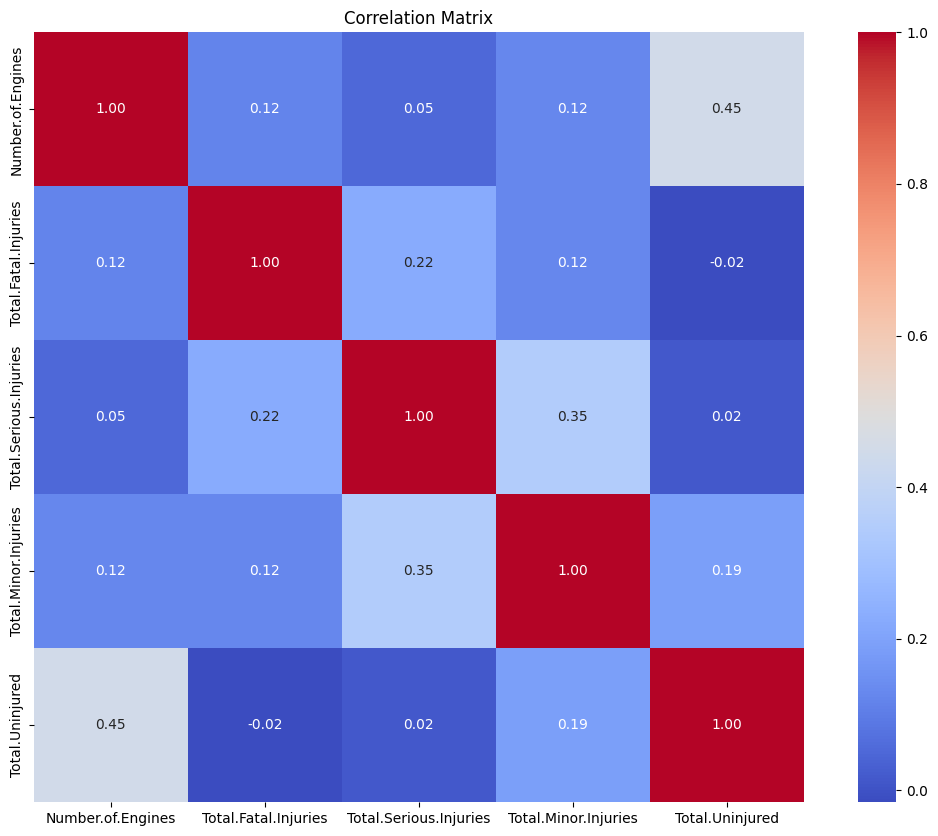

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

if not numeric_df.empty:
    plt.figure(figsize=(14,10))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)
    plt.title('Correlation Matrix')
    plt.show()
else:
    print("No numeric data available for correlation heatmap.")

# Evaluation

The analysis successfully identified safer aircraft manufacturers and revealed that planes with more engines are linked to less severe accidents.
Since this was a descriptive analysis, evaluation focused on how well the insights addressed business questions and supported risk-aware decision-making.

# Recommendations

1. Focus investments on aircraft models built by manufacturers who show consistently low numbers of accidents and incidents over time. This will help minimize operational risks and reduce potential insurance and maintenance costs.

2. Favor aircraft with more engines for enhanced safety and reliability. Multiple engines provide greater mechanical redundancy, which can reduce the risk of technical failure and improve overall safety performance.

3. Focusing on aircraft with less severe accident outcomes can protect both company reputation and financial stability.

# Conclusion

This project provided valuable insights into aviation risks by analyzing historical accident data. The findings highlight safer manufacturers and show that aircraft with more engines tend to have lower accident severity due to greater redundancy, supporting safer investment decisions. While the insights are based on historical data, they offer a strong foundation, and future work should incorporate newer safety and maintenance records to further refine recommendations as the business grows.

# Save cleaned Data

In [19]:
data.to_csv('/content/sample_data/Cleaned_AviationData.csv', index=False)

print("\nCleaned dataset saved successfully!")


Cleaned dataset saved successfully!
